In [18]:
import numpy as np
import pandas as pd
from itertools import product
from fbprophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import cross_validation, performance_metrics

%matplotlib inline

In [19]:
plt.rcParams['figure.figsize']=(10,7.5)

Import Data

In [20]:
df= pd.read_csv("/content/portland-oregon-average-monthly-.csv")
df.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [21]:
df.columns=['ds','y']
df.head()

,ds,y
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [22]:
df.tail()

,ds,y
109,1969-02,1425
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327


In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
y,114.0,1120.54386,270.888317,613.0,885.0,1158.0,1340.0,1558.0


In [24]:
df["ds"]= pd.to_datetime(df['ds'])


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      114 non-null    datetime64[ns]
 1   y       114 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


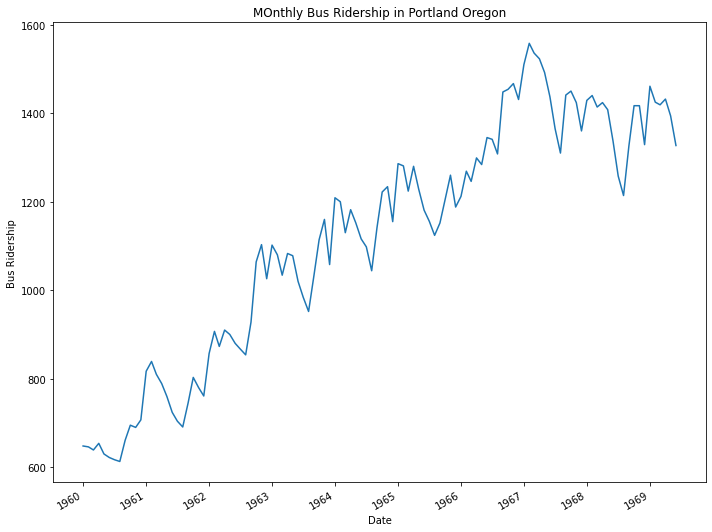

In [26]:
fig, ax= plt.subplots()

locator=mdates.AutoDateLocator()

ax.plot(df.ds,df.y)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Date")
ax.set_ylabel("Bus Ridership")

ax.set_title("MOnthly Bus Ridership in Portland Oregon")

fig.autofmt_xdate()
fig.tight_layout()

##HyperParameter Tunning

In [27]:
param_grid={
    
    "changepoint_prior_scale": [0.001,0.01,0.1,0.5],
    "seasonality_prior_scale": [0.01,0.1,1.0,10.0]
}

params= [dict(zip(param_grid.keys(),v)) for v in product(*param_grid.values())]

rmses=[]

cutoffs= pd.date_range(start= "1961-01-01", end= "1969-06-01", freq= "6MS")

for param in params:
  m= Prophet(**param)
  m.add_country_holidays(country_name= "US")
  m.fit(df)

  df_cv= cross_validation(model=m, horizon= "365 days",cutoffs=cutoffs)
  df_p=performance_metrics(df_cv,rolling_window=1)
  rmses.append(df_p["rmse"].values[0])

tunning_results= pd.DataFrame(params)
tunning_results['rmse']= rmses

best_params= params[np.argmin(rmses)]

print(best_params)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/17 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/17 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/17 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/17 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/17 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/17 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/17 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/17 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/17 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/17 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/17 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/17 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/17 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/17 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/17 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/17 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}


In [28]:
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}


##Fit Best Model

In [29]:
m= Prophet(
    changepoint_prior_scale=0.01,
    seasonality_prior_scale=0.01
)

m.add_country_holidays(country_name="US")

m.fit(df);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Make Forecast

In [31]:
future= m.make_future_dataframe(periods=12, freq="M")

In [32]:
future.tail()

,ds
121,1970-01-31
122,1970-02-28
123,1970-03-31
124,1970-04-30
125,1970-05-31


In [34]:
forecast= m.predict(future)

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
121,1970-01-31,1648.653569,1537.414039,1760.390779
122,1970-02-28,1627.242468,1511.027736,1735.578057
123,1970-03-31,1651.402899,1546.611341,1757.951585
124,1970-04-30,1633.835144,1535.700308,1739.040872
125,1970-05-31,1611.023968,1503.299129,1720.473339


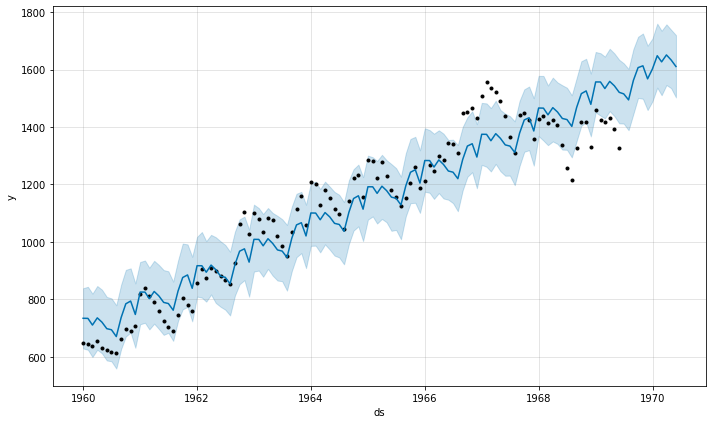

In [36]:
forecast_fig= m.plot(forecast)

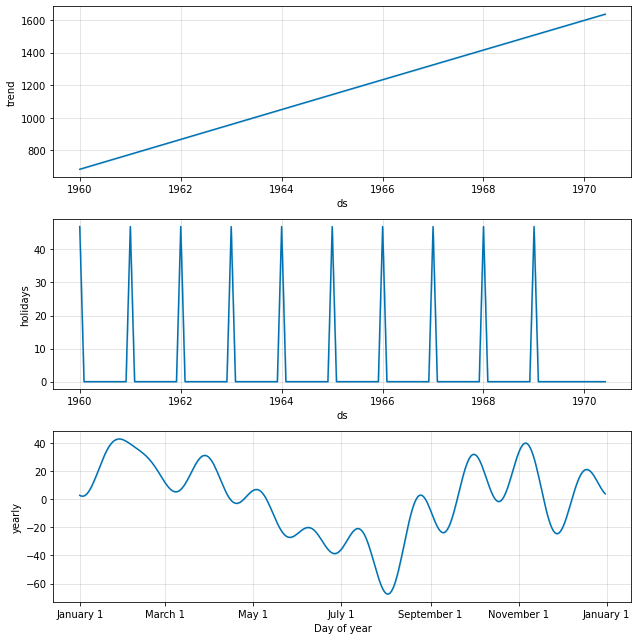

In [38]:
components_fig= m.plot_components(forecast)

##Performance Metrics

  0%|          | 0/17 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


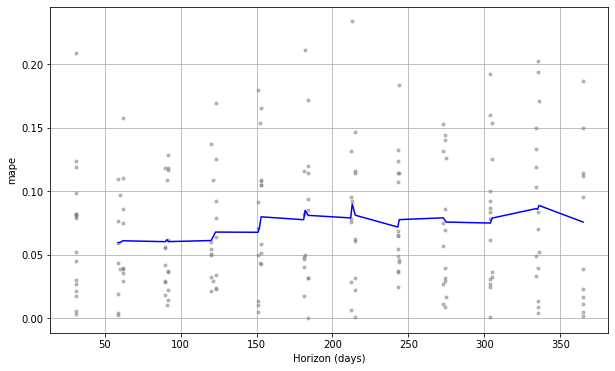

In [39]:
  df_cv= cross_validation(model=m, horizon= "365 days",cutoffs=cutoffs)

  df_p= performance_metrics(df_cv)

  fig= plot_cross_validation_metric(df_cv,metric= "mape")